## **Your Name:** Mehul
## **The project I attempted was:** (1) Tabular

# CSC8111 Coursework Specification

For this coursework you will perform **THREE** short questions which cover the breadth of the machine learning module along with attempting **ONE** of the four longer project-style questions. All of the short tasks and longer project-style questions can be found in this notebook. You should provide all of your answers in this notebook and submit it to Canvas before the submission deadline.

The learning objectives of these short questions are:
- To demonstrate a wide-range of machine learning skills.
- To be able to apply the most appropriate approach at the right time.



---
## Question 1: Classification (10 marks)

Load the dataset below, where X and y are the feature (input) variables and target (output) variable. Based on this dataset, build TWO classifiers using different machine learning approaches to predict the two classes in the target variable. You are free to use any appropriate machine learning models and libraries, but you need to split the dataset into training and test sets and optimise the model's hyperparameters (e.g. using GridSearchCV()). As a result, the performance metrics of the best classifier should be reported over the test set. Please follow the steps below to complete the code.

The dataset is available at:
https://ncl.instructure.com/courses/53509/files/7659751?wrap=1 and
https://ncl.instructure.com/courses/53509/files/7659755?wrap=1


## Set up the environment and load the dataset

In [ ]:
# just run this cell, don't change the code
import numpy as np
from numpy import loadtxt
X = loadtxt('cls_X.csv', delimiter=',')
y = loadtxt('cls_y.csv', delimiter=',')

## Q1.1 Split the data into training and test sets (20% for testing)

In [ ]:
# write your code below to replace the ellipsis "..."

# Importing required libraries
from sklearn.model_selection import train_test_split

# Split the data and keep 20% for testing purpose by specifying test_size as 0.2
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X1_train.shape)
print("X_test shape:", X1_test.shape)
print("y_train shape:", y1_train.shape)
print("y_test shape:", y1_test.shape)

X_train shape: (320, 6)
X_test shape: (80, 6)
y_train shape: (320,)
y_test shape: (80,)


## Q1.2 Create your first classifier

#### Q1.2.1 First, make an attempt by using an appropriate machine learning method without optimising the hyperparameter(s). Report the model accuracy over the test set (i.e. test accuracy).

In [ ]:
# write your code below to replace the ellipsis "..."

# Importing required libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Creating the instance of support vector classifier
svm = SVC()

# Fitting the training data in order to train the model
svm.fit(X1_train, y1_train)

# Making predictions based on testing data
svm_predictions = svm.predict(X1_test)

# Evaluating performance of the model by checking its accuracy
print("SVM Performance:")
print("Accuracy of support vector machine: ", accuracy_score(y1_test, svm_predictions))

SVM Performance:
Accuracy of support vector machine:  0.8875


#### Q1.2.2 Then, optimise the hyperparameter(s) using the same machine learning method as above. Report the best hyperparameter(s) and, use it to make your first classifier and print out its test accuracy.

In [ ]:
# write your code below to replace the ellipsis "..."

# Importing required libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Creating the instance of support vector classifier
svm = SVC()

# Defining the parameter grid of hyperparameters to optimize
param_grid = {'C': [0.1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}

# Fitting the grid search to the data
svm_grid = GridSearchCV(svm, param_grid, cv=5)
svm_grid.fit(X1_train, y1_train)

# Searching for the best hyperparameters and printing them
best_parameters = svm_grid.best_params_
print("Best Hyperparameters found:", best_parameters)

# Use the best parameters found to create optimized SVM
optimized_svm = SVC(**best_parameters)
optimized_svm.fit(X1_train, y1_train)

# Making predictions on the testing data
optimized_svm_predictions = optimized_svm.predict(X1_test)

# Evaluate the model
print("\nSVM Performance with Best Hyperparameters:")
print("Accuracy of optimized support vector machine: ", accuracy_score(y1_test, optimized_svm_predictions))

Best Hyperparameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

SVM Performance with Best Hyperparameters:
Accuracy of optimized support vector machine:  0.9


## Q1.3 Create your second classifier

#### Q1.3.1 First, without optimising the hyperparameter(s), make an attempt by using a different machine learning method to the first classifier. Report the model accuracy over the test set (i.e. test accuracy).

In [ ]:
# write your code below to replace the ellipsis "..."

# Importing required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Creating an instance of KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Training the algorithm with help of training set
knn.fit(X1_train, y1_train)

# Prediction on the testing data
knn_pred = knn.predict(X1_test)

# Evaluate the model
print(f"Accuracy of KNN with 3 nearest neighbours: {accuracy_score(y1_test, knn_pred)}")

Accuracy of KNN with 3 nearest neighbours: 0.8875


#### Q1.3.2 Then, optimise the hyperparameter(s) using the same machine learning method as above. Report the best hyperparameter(s) and, use it to make your second classifier and print out its test accuracy.



In [ ]:
# write your code below to replace the ellipsis "..."

# Importing required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Creating an instance of KNN classifier
knn = KNeighborsClassifier()

# Defining the parameter grid of hyperparameters to optimize
parameter_grid = {'n_neighbors': [1, 4, 6], 'p': [1, 2]}

# Fitting the grid search to the data
knn_grid_search = GridSearchCV(estimator=knn, param_grid=parameter_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X1_train, y1_train)

# Searching the best hyperparameter(s) and printing them
knn_best_parameters = knn_grid_search.best_params_
print("Best Hyperparameters:", knn_best_parameters)

# Using the best model for prediction
optimized_knn = KNeighborsClassifier(**knn_best_parameters)
optimized_knn.fit(X1_train, y1_train)

# Making predictions on the testing data
optimized_knn_predictions = optimized_knn.predict(X1_test)

# Calculate accuracy using the best model
print(f"\nAccuracy of optimized KNN with best parameters: {accuracy_score(y1_test, optimized_knn_predictions)}")

Best Hyperparameters: {'n_neighbors': 4, 'p': 2}

Accuracy of optimized KNN with best parameters: 0.925


## Q1.4 Report the precision, recall, f1 score and confusion matrix on the best of the two classifiers

In [ ]:
# write your code below to replace the ellipsis "..."

# Importing required libraries
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculating precision, recall, and F1-score of optimized KNN algorithm
precision = precision_score(y1_test, optimized_knn_predictions)
recall = recall_score(y1_test, optimized_knn_predictions)
f1 = f1_score(y1_test, optimized_knn_predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y1_test, optimized_knn_predictions)
print("Confusion Matrix:")
print(cf_matrix)

Precision: 0.9523809523809523
Recall: 0.9090909090909091
F1-score: 0.9302325581395349
Confusion Matrix:
[[34  2]
 [ 4 40]]


---
## Question 2: Regression (10 marks)

In this question you are given a simple dataset which you will perform regression on to predict values. You will build TWO Regression models and then take the best one and perform hyperparameter tuning on it.

## Set up the environment

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

## Read in the data

You'll need to download the data.csv file from https://ncl.instructure.com/courses/53509/files/7657710?wrap=1 and upload it to your Google Drive. I placed it in a folder called data. Then you need to mount your Google Drive in Colab (cell below).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Then read in the data

In [ ]:
data = np.loadtxt('/content/drive/MyDrive/data/data.csv', delimiter=',')
print(data)

[[1.00000000e+00 9.00000000e+00 2.57259990e+00 2.49788633e+02]
 [1.00000000e+00 5.00000000e+00 9.21413366e+00 5.04502032e+02]
 [1.00000000e+00 1.70000000e+01 7.12330090e+00 1.33580225e+03]
 ...
 [5.00000000e+00 3.10000000e+01 6.80121067e+00 3.15979690e+03]
 [5.00000000e+00 1.00000000e+01 4.14995662e+00 6.21315789e+02]
 [5.00000000e+00 9.00000000e+00 9.61878173e+00 1.30105857e+03]]


## Q2.1 Split the data into X and y

X is the first three columns

y is the last column

In [ ]:
# your answer here

# Splitting the data into X and y
X = data[:,:3]
y = data[:,3]
# Printing the shape of X and y
print("X: ", X.shape)
print("y: ", y.shape)

X:  (1000, 3)
y:  (1000,)


## Q2.2 Create the Train and Test datasets

20% of the data is kept back for testing

In [ ]:
# your answer here

# Split the data into training and testing set
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shape of train and test data
print("X_train shape:", X2_train.shape)
print("X_test shape:", X2_test.shape)
print("y_train shape:", y2_train.shape)
print("y_test shape:", y2_test.shape)

X_train shape: (800, 3)
X_test shape: (200, 3)
y_train shape: (800,)
y_test shape: (200,)


## Q2.3 Use TWO Regression approaches on the dataset

In each case report the R^2 value against the test data.

Q2.3.1 Regression approach 1

### Approach 1: Linear Regression.

In [ ]:
# your answer here

# Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Creating an instance of linear regression
linear_regression = LinearRegression()

# Training the model using train set
linear_regression.fit(X2_train, y2_train)

# Making prediction on test data
linear_prediction = linear_regression.predict(X2_test)

# Evaluating the performance of the model
linear_r2value = r2_score(y2_test, linear_prediction)
print("R^2 value for Linear Regression: ", linear_r2value)

R^2 value for Linear Regression:  0.8625374681259913


Q2.3.2 Regression approach 2

### Approach 2: Decision Tree Regression

In [ ]:
# your answer here

# Importing required libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Creating an instance of Decision Tree Regressor
decisiontree_regression = DecisionTreeRegressor(max_depth=5, random_state=42)

# Training the model using train set
decisiontree_regression.fit(X2_train, y2_train)

# Predicting on the test data
decisiontree_prediction = decisiontree_regression.predict(X2_test)

# Evaluating the performance of the model
decisiontree_r2value = r2_score(y2_test, decisiontree_prediction)
print("R^2 value for Decision Tree Regression: ", decisiontree_r2value)

R^2 value for Decision Tree Regression:  0.916664211341809


## Q2.4 Optimise the hyperparameters

Take your best Regression approach from above and identify the best hyperparameters. Note as some Regression approaches have many hyperparameters you may limit yourself here to just THREE.

Q2.4.1 Search for the best hyperparameters

In [ ]:
# your answer here

# Importing required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

decisiontree_regression = DecisionTreeRegressor(random_state=42)

# Defining the grid of hyperparameters to search
tree_parameter_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Fitting the grid search to the data
tree_grid_search = GridSearchCV(estimator=decisiontree_regression, param_grid=tree_parameter_grid, cv=5, scoring='neg_mean_squared_error')
tree_grid_search.fit(X2_train, y2_train)

# Getting the best parameters found by GridSearchCV
tree_best_parameters = tree_grid_search.best_params_

Q2.4.2 Output the best hyperparameters found

In [ ]:
# your answer here

# Printing the best parameters found
print("Best Hyperparameters found: ", tree_best_parameters)

Best Hyperparameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Q2.4.3 Show the results for the best model

In [ ]:
# your answer here

# Creating the instance of DecisionTreeRegressor using best hyperparameters
optimized_decisiontree_regression = DecisionTreeRegressor(**tree_best_parameters)

# Training the optimized decision tree model with train set
optimized_decisiontree_regression.fit(X2_train, y2_train)

# Making predictions on testing data
optimized_decisiontree_predictions = optimized_decisiontree_regression.predict(X2_test)

# Evaluating the performance of optimized decision tree regression
optimized_decisiontree_r2value = r2_score(y2_test, optimized_decisiontree_predictions)
print("R^2 value for optimized Decision Tree Regression: ", optimized_decisiontree_r2value)

R^2 value for optimized Decision Tree Regression:  0.9823223105850983


---
## Question 3: Deep Learning (10 marks)

Q3.1 For MNIST dataset, implement a deep learning model with 3 hidden layers with layer size: 128, 256, 50.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist
import keras.utils as utils

batch_size = 128
nb_classes = 10
im_dim = 784 # the total pixel number
nb_epoch = 2

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, im_dim)
X_test = X_test.reshape(10000, im_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Write down your code about MLP model for question Q3.1 here
# you should call your model 'model'

model = Sequential()
model.add(Dense(input_dim=im_dim,units=128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=50))
model.add(Activation('relu'))
model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Here we have implemented a MLP model with 3 hidden layers of size 128, 256 and 50.

Add code to output your network structure

In [ ]:
# your code here

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                1

In [ ]:
for iterator, layer in enumerate(model.layers):
    print(f"Layer {iterator+1}: {layer.name} - Number of input dimensions: {layer.output_shape[0]} - Number of neurons: {layer.output_shape[1]}")

Layer 1: dense - Number of input dimensions: None - Number of neurons: 128
Layer 2: activation - Number of input dimensions: None - Number of neurons: 128
Layer 3: dropout - Number of input dimensions: None - Number of neurons: 128
Layer 4: dense_1 - Number of input dimensions: None - Number of neurons: 256
Layer 5: activation_1 - Number of input dimensions: None - Number of neurons: 256
Layer 6: dropout_1 - Number of input dimensions: None - Number of neurons: 256
Layer 7: dense_2 - Number of input dimensions: None - Number of neurons: 50
Layer 8: activation_2 - Number of input dimensions: None - Number of neurons: 50
Layer 9: dense_3 - Number of input dimensions: None - Number of neurons: 10
Layer 10: activation_3 - Number of input dimensions: None - Number of neurons: 10


Train the model for just two epochs to show it works. All code provided - just run.

In [ ]:
# Train
history = model.fit(X_train, Y_train, epochs=nb_epoch,
                    validation_split = 0.2,
                    batch_size=batch_size, verbose=1)

# Evaluate
evaluation = model.evaluate(X_test, Y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

Epoch 1/2
375/375 [==============================] - 6s 12ms/step - loss: 0.5027 - accuracy: 0.8433 - val_loss: 0.1682 - val_accuracy: 0.9490
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.1269 - accuracy: 0.9587
Summary: Loss over the test dataset: 0.13, Accuracy: 0.96


Q 3.2 For MNIST dataset, implement a CNN model with only one 2D CNN layer as the hidden layer.

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 2

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# input image dimensions
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# Write down your code about the CNN model of Q3.2 here
# you should call your model 'model'

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

Add code to output your network structure

In [ ]:
# your code here

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We just train for two epochs to demonstrate that the network does work. Just run it.

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
              verbose=1, shuffle=True,
              validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (score[0], score[1]))

Epoch 1/2
375/375 [==============================] - 16s 41ms/step - loss: 0.4006 - accuracy: 0.8873 - val_loss: 0.1696 - val_accuracy: 0.9523
Epoch 2/2
375/375 [==============================] - 15s 41ms/step - loss: 0.1406 - accuracy: 0.9610 - val_loss: 0.1156 - val_accuracy: 0.9684
Summary: Loss over the test dataset: 0.12, Accuracy: 0.97


---
---
---
#Mini-projects: Introduction

The remainder of this document defines four project-style questions which go more deeply into one of the areas from the module. You should pick **ONE** of these project-stye questions to answer.

The learning objectives of this assignment are:
1. To learn about the design of machine learning analysis pipelines
2. To understand how to select appropriate methods given the dataset type
3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
4. To critically evaluate the performance of the designed machine learning pipelines
5. To learn and practice the skills of reporting machine learning experiments

For this coursework you will be provided with a choice of four different datasets of different nature
1. A tabular dataset (defined as a classification problem)
2. An image dataset
3. A text dataset
4. A time series dataset

Your job is easy to state: You should pick ONE out of these four options and design a range of machine learning pipelines appropriate to the nature of each of the selected datasets. Overall, we expect that you will perform a thorough investigation involving (whenever relevant) all parts of a machine learning pipeline (exploration, preprocessing, model training, model interpretation and evaluation), evaluating a range of options for all parts of the pipeline and with proper hyperparameter tuning.

You will have to write a short report (as part of this notebook) that presents the experiments you did, their justification, a detailed description of the performance of your designed pipelines using the most appropriate presentation tools (e.g., tables of results, plots). We expect that you should be able to present your work at a level of detail that would enable a fellow student to reproduce your steps.

## Deliverables
An inline report and code blocks addressing the marking scheme below. The report should have 1000 to 2000 words. The word count excludes references, tables, figures and section headers, and has a 10% leeway.

## Marking scheme

- Writing Style, references, figures, etc. 7 marks
- Dataset exploration 7 marks
- Methods 21 marks
- Results of analysis 21 marks
- Discussion 14 marks

---
---
## Project 1: Tabular dataset (70 marks)

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label is about the severity of the accident. It has 20 features and over 100K examples. The dataset is available in Canvas as a CSV file, in which the last column contains the class labels: https://ncl.instructure.com/courses/53509/files/7652449/download?download_frd=1

Experiments on the tabular dataset will be relatively fast compared to the other three options. To compensate, we expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data normalisation, feature/instance selection, class imbalance correction, several (appropriate) machine learning models, hyperparameter tuning and cross-validation evaluation.

## Your answer below

### The code block below is used for importing required libraries

In [ ]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read the dataset and store it in pandas dataframe

data = pd.read_csv("fars.csv")
data

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Alabama,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,Alabama,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
2,Alabama,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
3,Alabama,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
4,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100963,Wyoming,10,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Left_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Possible_Injury
100964,Wyoming,9,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Possible_Injury
100965,Wyoming,7,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Middle,Lap_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Possible_Injury
100966,Wyoming,4,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Middle,Lap_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Te

## Let us check the data types of columns present in the dataset



## Checking if there are any missing values present in the dataset



In [ ]:
print(data.isnull())

noofmissingvalues = data.isnull().sum()
print(noofmissingvalues)

        CASE_STATE    AGE    SEX  PERSON_TYPE  SEATING_POSITION  \
0            False  False  False        False             False   
1            False  False  False        False             False   
2            False  False  False        False             False   
3            False  False  False        False             False   
4            False  False  False        False             False   
...            ...    ...    ...          ...               ...   
100963       False  False  False        False             False   
100964       False  False  False        False             False   
100965       False  False  False        False             False   
100966       False  False  False        False             False   
100967       False  False  False        False             False   

        RESTRAINT_SYSTEM-USE  AIR_BAG_AVAILABILITY/DEPLOYMENT  EJECTION  \
0                      False                            False     False   
1                      False                 

### After executing above code block it can be seen that there are no missing values present in the dataset as there is a boolean value of "False" for each column and also number of missing values for each column in the datasset indicates 0.

# Checking if any duplicates are present in the dataset

In [ ]:
# checking duplicate data present in our provided dataset

duplicate_data = data[data.duplicated()]
duplicate_data

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
69,Alabama,1,Male,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Right_Side,Child_Safety_Seat,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
126,Alabama,99,Unknown,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),No_Injury
170,Alabama,99,Unknown,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),No_Injury
173,Alabama,32,Female,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
225,Alabama,1,Male,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Right_Side,Child_Safety_Seat,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100539,Wisconsin,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),No_Injury
100542,Wisconsin,32,Female,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
100786,Wyoming,46,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fata

In [ ]:
duplicate_data.shape

(7964, 30)

Here we can see that about 7964 rows are duplicate in our dataset. We can remove this duplicate data which in turn will increase the effeciency. Duplicate data may lead to increase in processing time and distort the analysis and model training.

## First we will remove the duplicate data that is present in the dataset

In [ ]:
# Removing duplicate data

unique_data = data.drop_duplicates()
unique_data

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Alabama,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,Alabama,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
2,Alabama,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
3,Alabama,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
4,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100963,Wyoming,10,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Left_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Possible_Injury
100964,Wyoming,9,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Possible_Injury
100965,Wyoming,7,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Middle,Lap_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Possible_Injury
100966,Wyoming,4,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Middle,Lap_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Te

In [ ]:
unique_data.shape

(93004, 30)

### Now we will convert the non numeric features present in the dataset into numeric format using one hot encoding.

In [ ]:
columns_to_drop = ['AGE', 'INJURY_SEVERITY','ALCOHOL_TEST_RESULT','DRUG_TEST_RESULTS_(1_of_3)','DRUG_TEST_RESULTS_(2_of_3)','DRUG_TEST_RESULTS_(3_of_3)']
workdata1 = unique_data
workdata1 = workdata1.drop(columns=columns_to_drop)
workdata1

,CASE_STATE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,NON_MOTORIST_LOCATION,...,METHOD_OF_DRUG_DETERMINATION,DRUG_TEST_TYPE_(1_of_3),DRUG_TEST_TYPE_(2_of_3),DRUG_TEST_TYPE_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE
0,Alabama,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,Not_Applicable_-_Vehicle_Occupant,...,Not_Reported,Unknown_if_Tested_for_Drugs,Not_Tested_for_Drugs,Not_Tested_for_Drugs,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White
1,Alabama,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown,Not_Extricated,Not_Applicable_-_Vehicle_Occupant,...,Not_Reported,Not_Tested_for_Drugs,Not_Tested_for_Drugs,Not_Tested_for_Drugs,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White
2,Alabama,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,Not_Applicable_-_Vehicle_Occupant,...,Not_Reported,Not_Tested_for_Drugs,Not_Tested_for_Drugs,Not_Tested_for_Drugs,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black
3,Alabama,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,Not_Applicable_-_Vehicle_Occupant,...,Not_Reported,Not_Tested_for_Drugs,Not_Tested_for_Drugs,Not_Tested_for_Drugs,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable)
4,Alabama,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,Not_Applicable_-_Vehicle_Occupant,...,Not_Reported,Unknown_if_Tested_for_Drugs,Not_Tested_for_Drugs,Not_Tested_for_Drugs,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100963,Wyoming,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Left_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,Not_Applicable_-_Vehicle_Occupant,...,Not_Reported,Not_Tested_for_Drugs,Not_Tested_for_Drugs,Not_Tested_for_Drugs,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable)
100964,Wyoming,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,Not_Applicable_-_Vehicle_Occupant,...,Not_Reported,Not_Tested_for_Drugs,Not_Tested_for_Drugs,Not_Tested_for_Drugs,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable)
100965,Wyoming,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Middle,Lap_Belt,Air_Bag_Not_Available_for_this_Seat,Not_

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(workdata1)
categorical_cols = workdata1.columns
feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_data = pd.DataFrame(encoded_data, columns=feature_names)
encoded_data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CASE_STATE_Alabama,CASE_STATE_Alaska,CASE_STATE_Arizona,CASE_STATE_Arkansas,CASE_STATE_California,CASE_STATE_Colorado,CASE_STATE_Connecticut,CASE_STATE_Delaware,CASE_STATE_District_of_Columbia,CASE_STATE_Florida,...,RACE_Japanese,RACE_Korean,RACE_Multiple_Races_(Individual_races_not_specified;_ex._mixed),RACE_Not_a_Fatality_(Not_Applicable),RACE_Other_Asian_or_Pacific_Islander,RACE_Other_Indian_(Includes_South_and_Central_America),RACE_Samoan,RACE_Unknown,RACE_Vietnamese,RACE_White
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
93000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
93001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
93002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoded = LabelEncoder()

unique_data['INJURY_SEVERITY']= label_encoded.fit_transform(unique_data['INJURY_SEVERITY'])
unique_data['INJURY_SEVERITY']

<ipython-input-42-dae14214ea96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['INJURY_SEVERITY']= label_encoded.fit_transform(unique_data['INJURY_SEVERITY'])


0         1
1         1
2         1
3         2
4         1
         ..
100963    6
100964    6
100965    6
100966    6
100967    1
Name: INJURY_SEVERITY, Length: 93004, dtype: int64

In [ ]:
workdata3 = unique_data[['AGE','ALCOHOL_TEST_RESULT','DRUG_TEST_RESULTS_(1_of_3)','DRUG_TEST_RESULTS_(2_of_3)','DRUG_TEST_RESULTS_(3_of_3)', 'INJURY_SEVERITY']]
encoded_data.reset_index(drop=True, inplace=True)
workdata3.reset_index(drop=True, inplace=True)
new_data = pd.concat([encoded_data, workdata3], axis =1)
new_data

,CASE_STATE_Alabama,CASE_STATE_Alaska,CASE_STATE_Arizona,CASE_STATE_Arkansas,CASE_STATE_California,CASE_STATE_Colorado,CASE_STATE_Connecticut,CASE_STATE_Delaware,CASE_STATE_District_of_Columbia,CASE_STATE_Florida,...,RACE_Samoan,RACE_Unknown,RACE_Vietnamese,RACE_White,AGE,ALCOHOL_TEST_RESULT,DRUG_TEST_RESULTS_(1_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_RESULTS_(3_of_3),INJURY_SEVERITY
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,34,97,999,0,0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,20,96,0,0,0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43,96,0,0,0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,96,0,0,0,2
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,50,97,999,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10,96,0,0,0,6
93000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9,96,0,0,0,6
93001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7,96,0,0,0,6
93002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,96,0,0,0,6


## Now let us split the data into training and testing set

I have split the data as 80% and 20% where first part will be used for training the models and later will be used for testing.

In [ ]:
from sklearn.model_selection import train_test_split

X=new_data.drop(columns=['INJURY_SEVERITY'])
Y=new_data['INJURY_SEVERITY']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (74403, 362)
X_test shape: (18601, 362)
y_train shape: (74403,)
y_test shape: (18601,)


In [ ]:
# Importing required libraries
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


# Creating the instance of RandomOverSampler
random_oversampler = RandomOverSampler(random_state=42)

# Fitting the features and label of training set that needs to be oversampled
x_train_oversampled, y_train_oversampled = random_oversampler.fit_resample(X_train,y_train)

# Print class distribution before and after random oversampling
print('Original dataset shape', Counter(Y))
print('Resampled dataset shape', Counter(y_train_oversampled))

Original dataset shape Counter({1: 41442, 4: 15642, 2: 14230, 5: 12945, 6: 8104, 7: 399, 3: 233, 0: 9})
Resampled dataset shape Counter({4: 33224, 1: 33224, 5: 33224, 6: 33224, 2: 33224, 7: 33224, 3: 33224, 0: 33224})


# Exploring several machine learning models for classification

## Decision tree algorithm

In [ ]:
# Decision tree

# Importing the required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Creating an instance of DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Here we are training the model with our training data
decision_tree.fit(x_train_oversampled, y_train_oversampled)

# Next we will make predictions on testing set of our data
decision_tree_predictions = decision_tree.predict(X_test)

# Evaluating the model
accuracy1 = accuracy_score(y_test, decision_tree_predictions)
print(f"Accuracy of decision tree classifier: {accuracy1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, decision_tree_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, decision_tree_predictions))


Accuracy of decision tree classifier: 0.7277

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00      8218
           2       0.50      0.51      0.50      2881
           3       0.31      0.41      0.35        39
           4       0.83      0.80      0.81      3108
           5       0.36      0.35      0.36      2615
           6       0.23      0.24      0.23      1650
           7       0.43      0.45      0.44        86

    accuracy                           0.73     18601
   macro avg       0.46      0.47      0.46     18601
weighted avg       0.73      0.73      0.73     18601


Confusion Matrix:
[[   0    0    0    0    3    0    1    0]
 [   0 8214    1    0    0    0    0    3]
 [   0    0 1461   16    8 1014  381    1]
 [   0    0    6   16    1   10    6    0]
 [   0    0    5    2 2485  114  473   29]
 [   0    0 1078   13  105  927  481   11]
 [ 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameter(s) optimized decision tree algorithm

Next, we will optimize the hyperparameters of decision tree algorithm and then use it to train and test our data. This will basically fine tune the parameters that are set before the model begins learning. It will help to avoid the overfitting or underfitting of data, effectively utilize the resources and help in improving model's performance.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


# Defining the parameter grid to search
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4]
}

# Creating an instance of GridSearchCV
gridsearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit the grid search to the data
gridsearch.fit(x_train_oversampled, y_train_oversampled)

# Getting and printing the best parameters found by GridSearchCV
best_params = gridsearch.best_params_
print("Best hyperparameters:", best_params)

# Using the best parameters found to create the optimized decision tree classifier
optimized_decision_tree = DecisionTreeClassifier(**best_params)

# Training the optimized decision tree classifier
optimized_decision_tree.fit(x_train_oversampled, y_train_oversampled)

# Making predictions on the testing data
optimized_decision_tree_predictions = optimized_decision_tree.predict(X_test)

# Model evaluation with the optimized decision tree classifier
accuracy_optimized = metrics.accuracy_score(y_test, optimized_decision_tree_predictions)
print(f"Accuracy of optimized decision tree: {accuracy_optimized:.4f}")
print("\nClassification Report:")
print(metrics.classification_report(y_test, decision_tree_predictions))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test, decision_tree_predictions))

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of optimized decision tree: 0.7283

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00      8218
           2       0.50      0.51      0.50      2881
           3       0.31      0.41      0.35        39
           4       0.83      0.80      0.81      3108
           5       0.36      0.35      0.36      2615
           6       0.23      0.24      0.23      1650
           7       0.43      0.45      0.44        86

    accuracy                           0.73     18601
   macro avg       0.46      0.47      0.46     18601
weighted avg       0.73      0.73      0.73     18601


Confusion Matrix:
[[   0    0    0    0    3    0    1    0]
 [   0 8214    1    0    0    0    0    3]
 [   0    0 1461   16    8 1014  381    1]
 [   0    0    6   16  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here we have observed a marginal improvement in accuracy after doing hyperparameter optimization of decision tree algorithm. Accuracy changed from 0.7277 to 0.7283 which is a 0.1% increase.

## Random forest algorithm

In [ ]:
# Random forest

# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Creating an instance of RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier using training data
random_forest.fit(x_train_oversampled, y_train_oversampled)

# Make predictions on the testing data
random_forest_predictions = random_forest.predict(X_test)

# Evaluate the models performance
random_forest_accuracy1 = accuracy_score(y_test, random_forest_predictions)
print("Accuracy of random forest classifier: ", random_forest_accuracy1)
print("\nClassification Report:")
print(classification_report(y_test, random_forest_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, random_forest_predictions))

Accuracy of random forest classifier:  0.7480780603193377

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00      8218
           2       0.53      0.55      0.54      2881
           3       0.19      0.18      0.18        39
           4       0.83      0.86      0.84      3108
           5       0.40      0.40      0.40      2615
           6       0.25      0.22      0.24      1650
           7       0.57      0.42      0.48        86

    accuracy                           0.75     18601
   macro avg       0.47      0.45      0.46     18601
weighted avg       0.74      0.75      0.75     18601


Confusion Matrix:
[[   0    0    0    0    3    1    0    0]
 [   0 8215    0    0    0    0    0    3]
 [   0    0 1573   13    6  969  320    0]
 [   0    0   11    7    1   14    6    0]
 [   2    0    4    1 2665   76  345   15]
 [   0    0 1027   10  111 1048  

## Hyperparameter(s) optimized Random Forest Algorithm

In [ ]:
# Import all the necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Defining the parameter grid and their values to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]

}

# Creating an instance of Random Forest classifier
random_forest = RandomForestClassifier()

# Perform GridSearchCV to find the best hyperparameters
# Creating an instance of GridSearchCV
grid_search = GridSearchCV(random_forest, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train_oversampled, y_train_oversampled)

# Getting and printing the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Use the best model
optimized_random_forest = grid_search.best_estimator_

# Make predictions on the test set using the best model
optimized_random_forest_predictions = optimized_random_forest.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, optimized_random_forest_predictions)
print(f"\nAccuracy of the optimized oversampled Random Forest classifier: {accuracy}")
print("\nClassification Report:")
print(metrics.classification_report(y_test, optimized_random_forest_predictions))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test, optimized_random_forest_predictions))

Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy of the optimized oversampled Random Forest classifier: 0.7484543841728939

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00      8218
           2       0.53      0.55      0.54      2881
           3       0.21      0.21      0.21        39
           4       0.83      0.86      0.84      3108
           5       0.40      0.41      0.40      2615
           6       0.25      0.22      0.23      1650
           7       0.55      0.42      0.48        86

    accuracy                           0.75     18601
   macro avg       0.47      0.46      0.46     18601
weighted avg       0.74      0.75      0.75     18601


Confusion Matrix:
[[   0    0    0    0    3    1    0    0]
 [   0 8215    0    0    0    0    0    3]
 [   0    0 1576   13    6  974  312    0]
 [   0

Here we can observe the best hyperparameters selected for random forest algorithm. When we create an instance of random forest classifier using these hyperparameters and it gives us an accuracy of 0.7484. There is a slight increase in accuracy as compared to non optimized random forest classifier.

# Support Vector Machine (SVM) Algorithm

In [ ]:
# Importing required libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Creating an instance of support vector classifier
svm = SVC()

# Training the algorithm using training set
svm.fit(x_train_oversampled, y_train_oversampled)

# Making predictions on the testing set of the data
svm_predictions = svm.predict(X_test)

# Evaluating the model's performance
print("Accuracy of SVM model: ", accuracy_score(y_test, svm_predictions))
print("\nClassification Report:")
print(classification_report(y_test, svm_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

Accuracy of SVM model:  0.4418042040750497

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.44      1.00      0.61      8218
           2       0.00      0.00      0.00      2881
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00      3108
           5       0.00      0.00      0.00      2615
           6       0.00      0.00      0.00      1650
           7       0.00      0.00      0.00        86

    accuracy                           0.44     18601
   macro avg       0.06      0.12      0.08     18601
weighted avg       0.20      0.44      0.27     18601


Confusion Matrix:
[[   0    4    0    0    0    0    0    0]
 [   0 8218    0    0    0    0    0    0]
 [   0 2881    0    0    0    0    0    0]
 [   0   39    0    0    0    0    0    0]
 [   0 3108    0    0    0    0    0    0]
 [   0 2615    0    0    0    0    0    0]
 [   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
new_data

,CASE_STATE_Alabama,CASE_STATE_Alaska,CASE_STATE_Arizona,CASE_STATE_Arkansas,CASE_STATE_California,CASE_STATE_Colorado,CASE_STATE_Connecticut,CASE_STATE_Delaware,CASE_STATE_District_of_Columbia,CASE_STATE_Florida,...,RACE_Samoan,RACE_Unknown,RACE_Vietnamese,RACE_White,AGE,ALCOHOL_TEST_RESULT,DRUG_TEST_RESULTS_(1_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_RESULTS_(3_of_3),INJURY_SEVERITY
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,34,97,999,0,0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,20,96,0,0,0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43,96,0,0,0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,96,0,0,0,2
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,50,97,999,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10,96,0,0,0,6
93000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9,96,0,0,0,6
93001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7,96,0,0,0,6
93002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,96,0,0,0,6


# Data Normalization

Data normalization basically scales numeric features to a consistent range. We will perform normalization using MinMaxScaler which will scale the features between the range of 0 to 1. Normalization is done only on the features and not on labels

In [ ]:
# Importing required libraries
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the features training data and transform it
X_train_normalized = scaler.fit_transform(X_train)

# Transform the features testing data
X_test_normalized = scaler.transform(X_test)

X_train_normalized

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Here we can see all the features have now been converted between the range 0 to 1.

# Decision tree algorithm on non oversampled data

In [ ]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Creating an instance of DecisionTreeClassifier
decision_tree1 = DecisionTreeClassifier(random_state=42)

# Here we are training the model with our non oversampled data
decision_tree1.fit(X_train, y_train)

# Next we will make predictions on testing set of our data
decision_tree_predictions1 = decision_tree1.predict(X_test)

# Evaluating the model
accuracy2 = accuracy_score(y_test, decision_tree_predictions1)
print(f"Accuracy of decision tree classifier on non oversampled data: {accuracy2:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, decision_tree_predictions1))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, decision_tree_predictions1))

Accuracy of decision tree classifier on non oversampled data: 0.7385

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00      8218
           2       0.51      0.52      0.52      2881
           3       0.23      0.26      0.24        39
           4       0.83      0.84      0.83      3108
           5       0.38      0.38      0.38      2615
           6       0.25      0.23      0.24      1650
           7       0.36      0.34      0.35        86

    accuracy                           0.74     18601
   macro avg       0.44      0.45      0.44     18601
weighted avg       0.74      0.74      0.74     18601


Confusion Matrix:
[[   0    0    0    0    3    0    1    0]
 [   0 8215    1    0    0    0    0    2]
 [   0    0 1511    8    9 1011  339    3]
 [   0    0   10   10    1   11    7    0]
 [   0    0    5    2 2599  102  379   21]
 [   0    0 1065   18 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Cross Validation Evaluation

Cross validation can be used to test the performance of a machine learning model. In cross validation we divide the entire dataset into multiple folds, out of which one part is used for training the model and other is used for testing. Each fold is used for training and testing only once.

### Cross validation on decision tree

In [ ]:
# Importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,KFold

# Creating an instance of random forest classifier
d_t = DecisionTreeClassifier()
dt_kfold=KFold(n_splits=3)
d_t_score=cross_val_score(d_t,X,Y,cv=dt_kfold)
print("Cross Validation Scores are {}".format(d_t_score))
print("Average Cross Validation score :{}".format(d_t_score.mean()))

Cross Validation Scores are [0.74643571 0.75062095 0.75723364]
Average Cross Validation score :0.7514300997202904


### Cross validation on random forest

In [ ]:
# Importing required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold

# Creating an instance of random forest classifier
random_fc = RandomForestClassifier()
kfold=KFold(n_splits=3)
random_forest_score=cross_val_score(random_fc,X,Y,cv=kfold)
print("Cross Validation Scores are {}".format(random_forest_score))
print("Average Cross Validation score :{}".format(random_forest_score.mean()))

Cross Validation Scores are [0.77017612 0.77071707 0.77787813]
Average Cross Validation score :0.7729237747586888


---
---
## Project 2: Image dataset (70 marks)

The FMNISTMash dataset is an extension to the FMNIST dataset. In each 3-colour channel image there is one FMNIST image in each channel (see example below). The idea is to predict the number of unique classes in the three channels (0 - all images are of the same class, 1 - two different classes, 2 - three different classes). So for the example image there is a top and two jackets so lable is 1. Please download the data from:

|Data| URL|
|---|------|
|Train X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/train_x.npy |
| Train y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/train_y.npy |
| Validate X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/valid_x.npy |
| Validate y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/valid_y.npy |
| Test X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/test_x.npy |
| Test y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/test_y.npy |

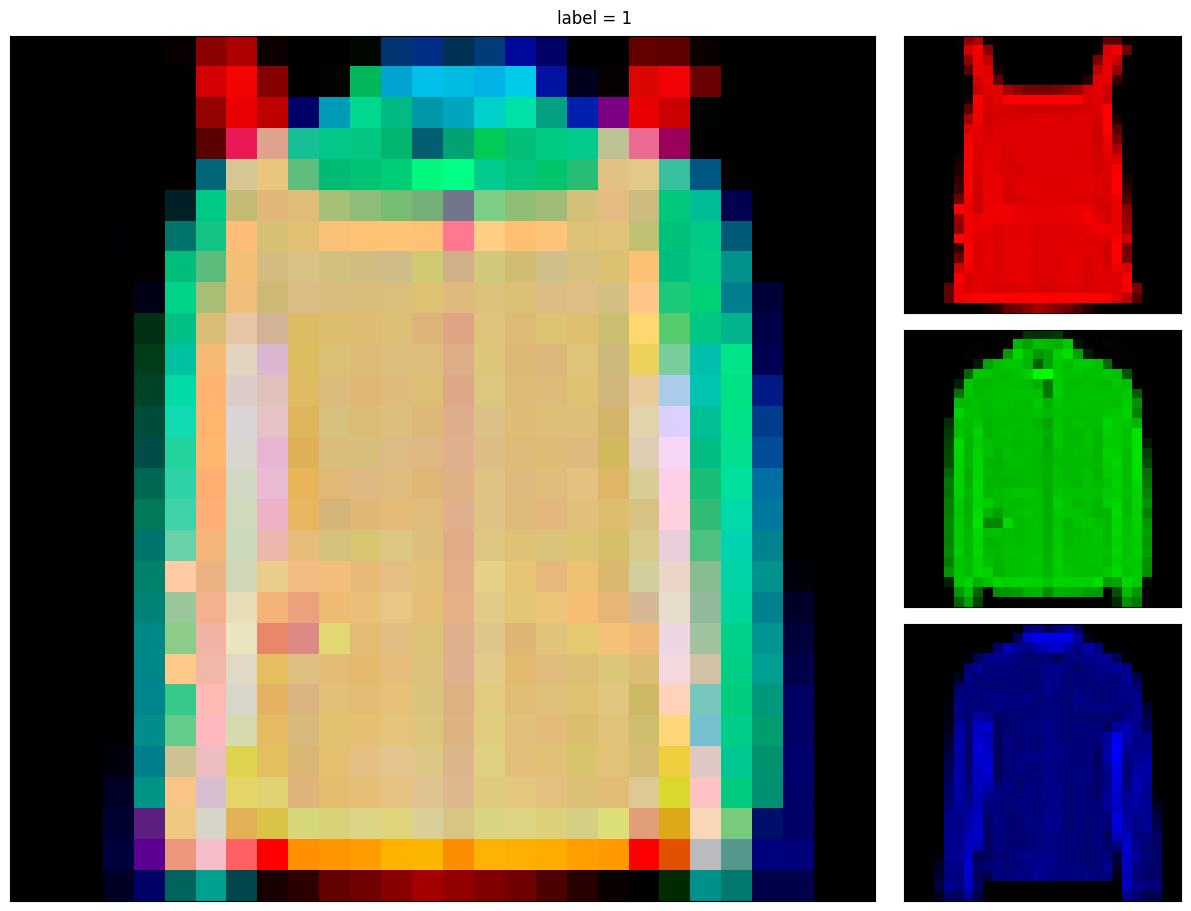
Figure 1: Example image from the FMNISTMash dataset, class label is 1

Your task is to produce TWO models for predicting the class of the image. Note: you can do ONE model which splits the image into its separate colour channels and performs a classification on them separately, but the other MUST work on all three chanels together.

Some hints:
- The code below shows you how to load and view the data.
- To speed up your work here are some hints (assuming you’re using Colab):
 - Make sure you set the Runtime type to either GPU or TPU.
 - Copy the data to your Google drive so you don’t have to keep uploading it. Full information on how to do this can be found at: https://colab.research.google.com/notebooks/io.ipynb
 - As the dataset is large you might want to do some of your initial testing on a subset of the data.

To load the data, we reccomend storing it in your Google Drive, this means you won't need to load it into the local colab storage every time you open the notebook.

The following import will allow your notebook to connect to Google Drive. When you run this cell a seperate window will pop up asking you to grant Drive access to colab. Grant it access to the account which contains FMNISTMash

## Load the data

The dataset is stored as six Numpy files, so to load them we will need to import Numpy. Before loading each file into its own vaiable.

**Note: you'll need to change the location of the file to wherever you stroed your files.**

In [ ]:
import numpy as np

train_x = np.load('/content/drive/MyDrive/data/FMNISTMash/train_x.npy', allow_pickle = True)
train_y = np.load('/content/drive/MyDrive/data/FMNISTMash/train_y.npy', allow_pickle = True)
valid_x = np.load('/content/drive/MyDrive/data/FMNISTMash/valid_x.npy', allow_pickle = True)
valid_y = np.load('/content/drive/MyDrive/data/FMNISTMash/valid_y.npy', allow_pickle = True)
test_x = np.load('/content/drive/MyDrive/data/FMNISTMash/test_x.npy', allow_pickle = True)
test_y = np.load('/content/drive/MyDrive/data/FMNISTMash/test_y.npy', allow_pickle = True)

## Check the shape of the data
Make sure the data is loaded and in the shape that you expect, FMNISTMash has 50,000 training images, 10,000 validation images, and 10,000 testing images.

In [ ]:
print(f'train_x shape: {train_x.shape}')
print(f'train_y shape: {train_y.shape}')
print(f'valid_x shape: {valid_x.shape}')
print(f'valid_y shape: {valid_y.shape}')
print(f'test_x shape: {test_x.shape}')
print(f'test_y shape: {test_y.shape}')

train_x shape: (50000, 3, 28, 28)
train_y shape: (50000,)
valid_x shape: (10000, 3, 28, 28)
valid_y shape: (10000,)
test_x shape: (10000, 3, 28, 28)
test_y shape: (10000,)


## Displaying the Images

### Displaying the single image

To display the images we are going to be using MatPlotLib, so we need to import that, standard practice is to import it as plt

In [ ]:
import matplotlib.pyplot as plt

The following two functions aren't necessary, they simply remove the axis ticks and numbers from the rendered image and perform some normalisation to the image.

In [ ]:
def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

In [ ]:
def image_normalisation(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

We construct the figure using plt, pyplot expects the colour channel to be last, the data is saved in a channels_first format so needs to be converted which is what we used np.move_axis for.

In [ ]:
def display_image(x, y):
    fig = plt.figure()
    main_ax = fig.add_subplot()
    fig.suptitle('label = '+ str(y))
    main_ax.imshow(image_normalisation(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)
    plt.show()

## Pick a random example and plot it

We want to plot a random image, so we import random and pick a random index using the number of images in train_x as a limit.

In [ ]:
import random

ri = random.randrange(train_x.shape[0])

We now render the image, the label indicates how many different FMNIST classes appear in the image.

- 0 = All images are the same class
- 1 = Two images share the same class
- 2 = All images are from different classes

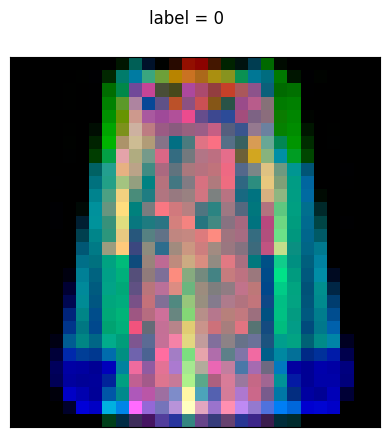

In [ ]:
display_image(train_x[ri], train_y[ri])

## Splitting the Image

This next section is just to make the dataset easier to understand. We will display the image, and then the three images that make it up seperately.

In [ ]:
def show_mnist_examples(x, y):
  fig = plt.figure(constrained_layout=True,figsize=(12,9), dpi=100)
  gs = fig.add_gridspec(3,4)
  main_ax = fig.add_subplot(gs[:3,:3])
  fig.suptitle('label = '+ str(y))
  main_ax.imshow(image_normalisation(np.moveaxis(x, 0, -1)))
  disable_ax_ticks(main_ax)

  for j in range(3):
      c_ax = fig.add_subplot(gs[j,-1])
      subimage = x.copy()
      subimage[:j] = 0
      subimage[j+1:] = 0
      subimage[j] = subimage[j]-subimage[j].min()
      c_ax.imshow(image_normalisation(np.moveaxis(subimage, 0, -1)))
      disable_ax_ticks(c_ax)
  plt.show()

Hopefully, you will see the same image rendered early along with the images in the respective colour channels, and you should be able to see which ones share a class from FMNIST and which ones differ. Careful though, as some classes are similar to others.

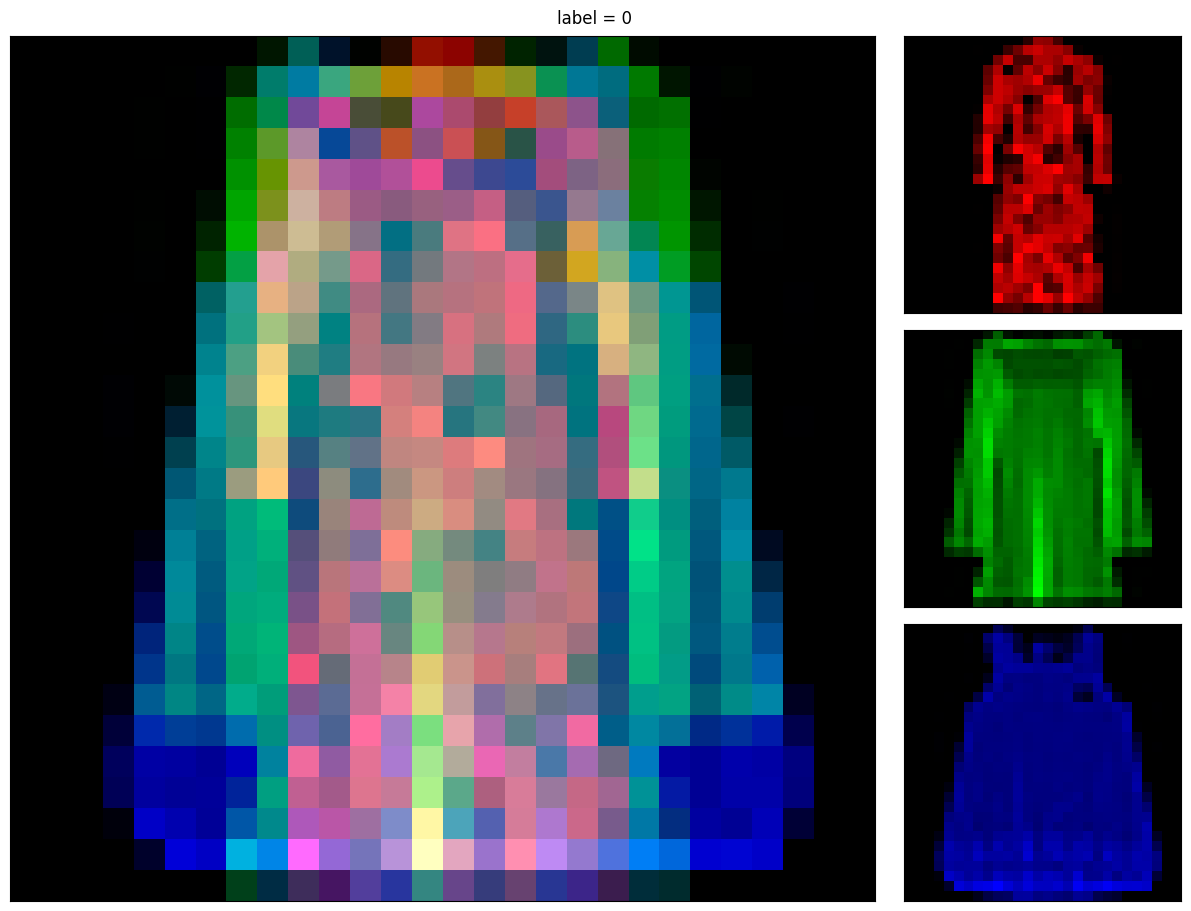

In [ ]:
show_mnist_examples(train_x[ri], train_y[ri])

## Your answer below

---
---
## Project 3: Text dataset (70 marks)

Dataset: sentiment analysis dataset (on canvas: (https://ncl.instructure.com/courses/53509/files/7666186?wrap=1), (https://ncl.instructure.com/courses/53509/files/7666193?wrap=1), (https://ncl.instructure.com/courses/53509/files/7666197?wrap=1)).
Each sample in the dataset represents a tweet. Each tweet has a sentiment label (Positive, Negative, Neutral).

**Task Description:** Apply **a combination of** different approaches including pre-processing techniques, shallow and deep classifiers, ensembled approaches, machine learning approaches beyond supervised learning if applicable, data augmentation if applicable to predict the sentiment of the test set. Try your best to improve the prediction results.

Primary **Evaluation metrics: F-1 measure**. Though you should also use others.

## Your answer below


---
---
## Project 4: Time-serise dataset (70 marks)

The Weather dataset is a time-series dataset collected by a Raspberry Pi computer at a home in Newcastle. It contains a bunch of different features about the weather collected over an approximate 12-month period. The features are as follows:

| Column no | Feature                                                  |
|-----------|----------------------------------------------------------|
|         1 | Date and time in standard Linux format                   |
|         2 | Temperature from the first internal sensor (Celsius)     |
|         3 | Outside temperature (Celsius)                            |
|         4 | CPU Temperature (Celsius)                                |
|         5 | Count (always 1)                                         |
|         6 | Temperature from the second internal sensor (Celsius)    |
|         7 | Air Pressure (mmHg)                                      |
|         8 | Humidity (percentage)                                    |

Readings are measured in one-minute intervals between November 2021 and December 2022. Your task is to try and predict future values 5, 10, 15, 30 minutes into the future along with 1, 2, 6 and 12 hours into the future. I.e. given a time-sequence of measurements before 10:20am on Friday 3rd June 2022 how accurately can you predict the values for 10:25, 10:30, 10:35 and 10:50am and for 11:20, 12:20, 16:20 and 22:20. You can do this for any of the 6 weather features (not date or count). You should separate out a test set of the last 2 months of data (you need to have a continuous and separate test set to prevent leakage between training and testing).

The dataset can be downloaded from:
http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/weather.csv

Some hints:
- There is some code below which shows you how to load and view the data to get you started.
- In order to score top marks for this dataset you should demonstrate multiple models, at least one of them should not use Deep Learning.
- To speed up your work here are some hints (assuming you’re using Colab):
 - Make sure you set the Runtime type to either GPU or TPU.
 - Copy the data to your Google drive so you don’t have to keep uploading it.
 - As the dataset is large you might want to do some of your initial testing on a subset of the data.

## Access to the files

The file is available from: http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/log.txt

You can upload the file each time you use them, but this might take some time as they are quite large. An eisier option is to uploade them to a Google drive folder and mount this.

Full information on how to do this can be found at: https://colab.research.google.com/notebooks/io.ipynb

In the code below I have created a folder in Google drive called data and placed the file above in it.

In [ ]:
# to access google drive folder
from google.colab import drive
drive.mount('/content/drive') # When you run this you'll be prompted for a token - follow the link to generate this.

## Load the data

The data is stored in mumpy data files. You can use numpy.load() to read these in.

**Note: you'll need to change the location of the file to wherever you stored your files.**

In [ ]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('/content/drive/MyDrive/data/log.txt', delimiter=',')

In [ ]:
print(data)

## Data structure

The columns are:
0. Date and time
1. Inside temperature 1
2. Outside temperature
3. CPU Temperature
4. Count
5. Inside temperature 2
6. Air Pressure (mmHg)
7. Humidity (%)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

plt.plot(data[:, [1]])
plt.plot(data[:, [2]])
plt.plot(data[:, [3]])
plt.plot(data[:, [4]])
plt.plot(data[:, [5]])
plt.plot(data[:, [6]])
plt.plot(data[:, [7]])

## Your answer below